In [1]:
using DrWatson
quickactivate(@__DIR__)

using StatsBase
using Plots
using DataFrames
using CSV

In [2]:
res = DrWatson.collect_results(
        datadir("windsurfers-interactions-sims"),
        rinclude=[r"DesKargamma[.]*"]
        #   black_list = bl,
    )
first(res, 10)

┌ Info: Scanning folder /home/pgorski/Desktop/programming/curheider/PolarizationFramework/data/windsurfers-interactions-sims for result files.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:115
┌ Info: Added 212 entries.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:191


,ode_fun_name,LP,LP_std,zmax,pos_links_changed_std,BR_std,GP
,String?,Float64?,Float64?,Int64?,Float64?,Float64?,Float64?
1,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
2,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
3,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
4,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
5,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
6,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
7,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
8,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
9,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0


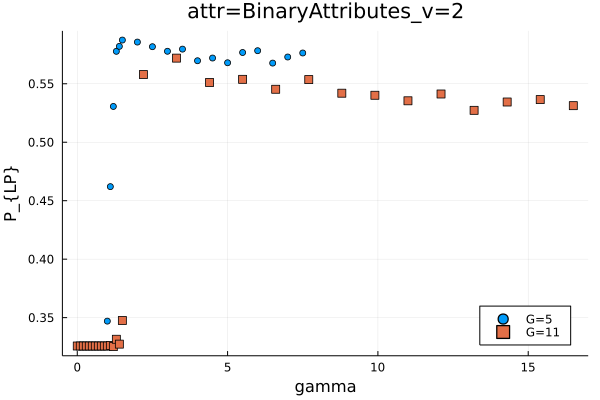

In [3]:
# N = 9
attr_name = "BinaryAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 2 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :bottomright)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

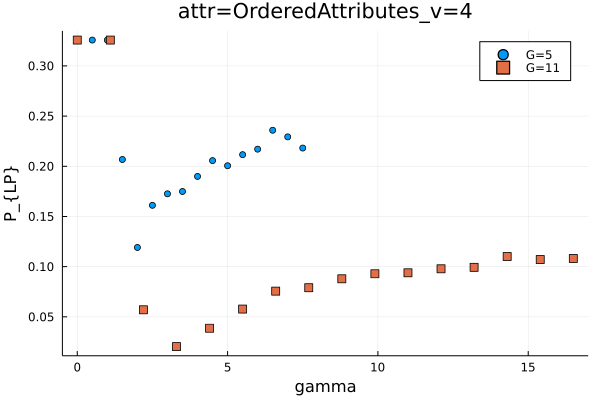

In [6]:
# N = 9
attr_name = "OrderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

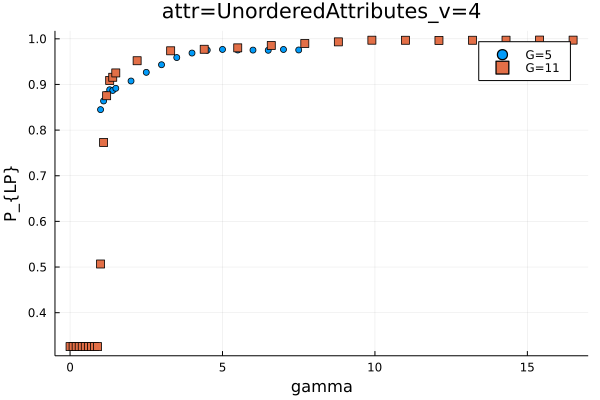

In [5]:
# N = 9
attr_name = "UnorderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

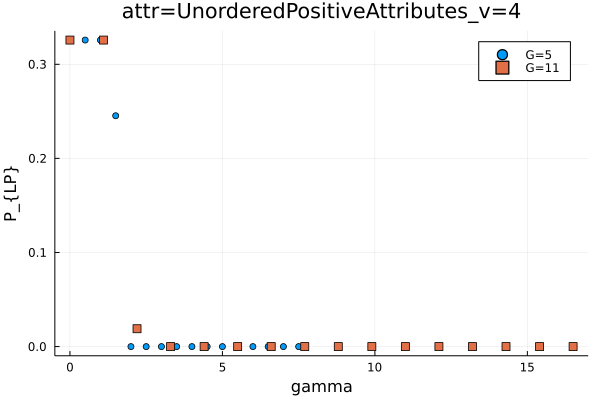

In [7]:
# N = 9
attr_name = "UnorderedPositiveAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

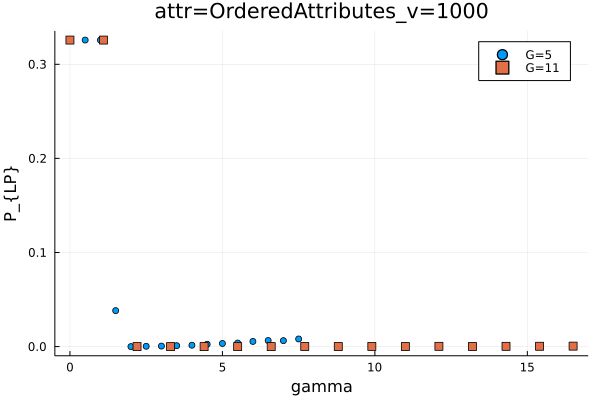

In [8]:
# N = 9
attr_name = "OrderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 1000 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

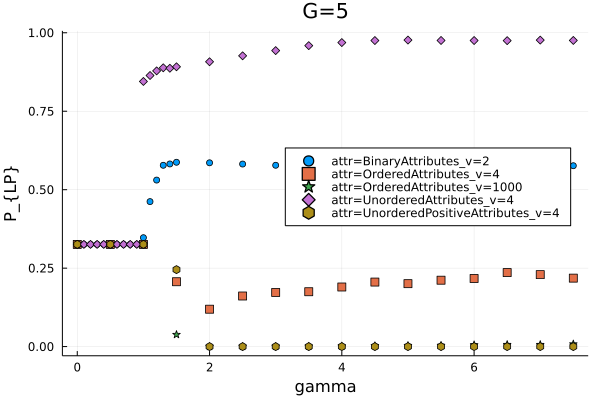

In [9]:
# N = 9
attr_name = ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
# attr_degeneracy = 2 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
attr_degeneracy = [@onlyif("attr_name" == "BinaryAttributes", 2), @onlyif("attr_name" != "BinaryAttributes", 4), @onlyif("attr_name" == "OrderedAttributes", 1000)] #includes CA
G = unique(res.G)
G = 5

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    attr = dict["attr_name"]
    v = dict["attr_degeneracy"]
    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = savename(@ntuple(attr, v)))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :right)
# attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(G)))

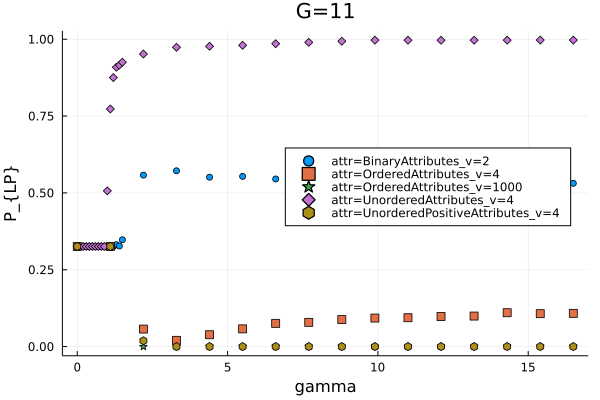

In [10]:
# N = 9
attr_name = ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
# attr_degeneracy = 2 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
attr_degeneracy = [@onlyif("attr_name" == "BinaryAttributes", 2), @onlyif("attr_name" != "BinaryAttributes", 4), @onlyif("attr_name" == "OrderedAttributes", 1000)] #includes CA
G = unique(res.G)
G = 11

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    attr = dict["attr_name"]
    v = dict["attr_degeneracy"]
    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = savename(@ntuple(attr, v)))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :right)
# attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(G)))

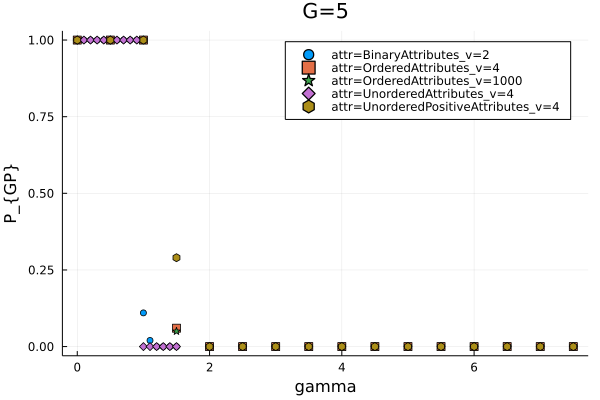

In [11]:
# N = 9
attr_name = ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
# attr_degeneracy = 2 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
attr_degeneracy = [@onlyif("attr_name" == "BinaryAttributes", 2), @onlyif("attr_name" != "BinaryAttributes", 4), @onlyif("attr_name" == "OrderedAttributes", 1000)] #includes CA
G = unique(res.G)
G = 5

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    attr = dict["attr_name"]
    v = dict["attr_degeneracy"]
    plot!(p, res.gamma[inds], res.GP[inds], seriestype=:scatter, markershape = markers[i], lab = savename(@ntuple(attr, v)))
end

plot(p, xlabel = "gamma", ylabel = "P_{GP}", legend = :topright)
# attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(G)))

In [19]:
dicts[1]

Dict{String, Any} with 3 entries:
  "attr_degeneracy" => 4
  "attr_name"       => "BinaryAttributes"
  "G"               => 5